In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

In [28]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [29]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [30]:
df['Diabetes_012'].replace(2.0, 1.0, inplace=True)

In [31]:
df['Diabetes_012'].value_counts()

0.0    213703
1.0     39977
Name: Diabetes_012, dtype: int64

In [32]:
df.drop_duplicates(inplace=True)
df['Diabetes_012'].value_counts()

0.0    190055
1.0     39657
Name: Diabetes_012, dtype: int64

In [33]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [34]:
df = df.drop(['Education', 'Income'], axis=1)

In [35]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000
mean,0.172638,0.454378,0.441697,0.959523,28.685711,0.465687,0.044765,0.103216,0.733283,0.612907,0.794760,0.060728,0.946059,0.092838,2.601205,3.506425,4.676425,0.185558,0.439141,8.085982
std,0.377935,0.497915,0.496590,0.197075,6.787118,0.498822,0.206787,0.304242,0.442244,0.487086,0.403877,0.238832,0.225903,0.290206,1.064778,7.714644,9.047423,0.388751,0.496283,3.093975
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


In [36]:
df = pd.get_dummies(df).astype(int)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11


In [38]:
#separating the features
X=df.drop('Diabetes_012', axis=1)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11


In [39]:
#target variable

y=df['Diabetes_012']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_012, dtype: int32

In [40]:
X.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

<Axes: xlabel='BMI'>

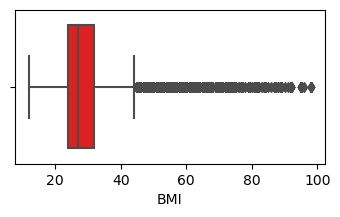

In [41]:
plt.figure(figsize=(4,2))
sns.boxplot(x= df["BMI"], color="red")
#X['BMI']

In [42]:
# Rebalancing

# Apply SMOTE to balance the class distribution
smote = SMOTE(sampling_strategy="minority")
X, y = smote.fit_resample(X,y)

print("\nClass distribution after SMOTE:")
print(y.value_counts())


Class distribution after SMOTE:
0    190055
1    190055
Name: Diabetes_012, dtype: int64


In [43]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# standardising to keep the features in the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
X_train

array([[ 0.92167304,  1.00495162,  0.17170951, ..., -0.52575183,
         1.20285353,  1.56236908],
       [-1.08498345, -0.99507278,  0.17170951, ...,  1.90203809,
        -0.83135642, -1.91763154],
       [ 0.92167304,  1.00495162,  0.17170951, ..., -0.52575183,
         1.20285353, -0.17763123],
       ...,
       [ 0.92167304,  1.00495162,  0.17170951, ..., -0.52575183,
         1.20285353,  0.17036883],
       [ 0.92167304, -0.99507278,  0.17170951, ..., -0.52575183,
        -0.83135642,  0.86636895],
       [-1.08498345,  1.00495162,  0.17170951, ...,  1.90203809,
        -0.83135642,  1.56236908]])

In [46]:
y_train.value_counts()

0    152057
1    152031
Name: Diabetes_012, dtype: int64

# KNN Classifier

In [73]:
#KNN start

knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train, y_train)

# Prediction on the test set

y_pred = knn.predict(X_test)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[26029 11969]
 [ 6600 31424]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74     37998
           1       0.72      0.83      0.77     38024

    accuracy                           0.76     76022
   macro avg       0.76      0.76      0.75     76022
weighted avg       0.76      0.76      0.75     76022



In [48]:
# KNN end
knn.score(X_test,y_test)

0.7557417589645102

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Training the model on resampled data
rf_classifier.fit(X_train, y_train)

# Prediction on the test set
y_pred = rf_classifier.predict(X_test)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))



Confusion Matrix:
[[29442  8556]
 [ 4705 33319]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.82     37998
           1       0.80      0.88      0.83     38024

    accuracy                           0.83     76022
   macro avg       0.83      0.83      0.83     76022
weighted avg       0.83      0.83      0.83     76022



In [50]:
#accuracy score
print(accuracy_score(y_test,y_pred))

0.8264449764541844


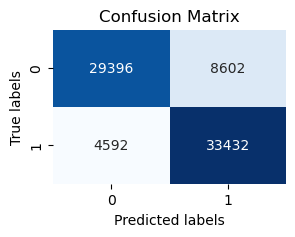

In [51]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
# random forest with 0.4 threshold to make sure that we have lesser false negatives

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Apply custom threshold (0.4)
threshold = 0.4
y_pred_custom_threshold = (y_pred_proba >= threshold).astype(int)

# Model Evaluation with custom threshold
print("Confusion Matrix with custom threshold:")
print(confusion_matrix(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))

Confusion Matrix with custom threshold:
[[26148 11850]
 [ 2808 35216]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     37998
           1       0.75      0.93      0.83     38024

    accuracy                           0.81     76022
   macro avg       0.83      0.81      0.80     76022
weighted avg       0.83      0.81      0.80     76022



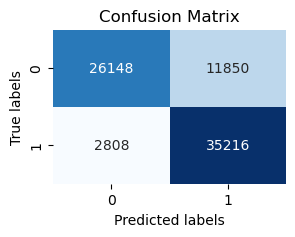

In [70]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold)

# Plot confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Other Trials

# XGBoost

In [69]:
#!pip install XGBoost

In [409]:
import xgboost as xgb
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [410]:
d_train = xgb.DMatrix(data = X_train, label = y_train)

In [411]:
param_xg = {'objective':'binary:logistic'}

In [412]:
d_test = xgb.DMatrix(data = X_test, label = y_test)

In [413]:
xg_run = xg.train(param_xg, d_train)

In [416]:
import numpy as np
y_pred = xg_run.predict(d_test)
threshold = 0.5
predicted_labels = np.where(y_pred > 0.5, 1, 0)
predicted_labels

array([0, 0, 0, ..., 1, 0, 0])

In [417]:
# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_labels))

Confusion Matrix:
[[30330  7668]
 [15910 22114]]


In [419]:
#accuracy score
print(accuracy_score(y_test,predicted_labels))

0.6898529373076214


# XGBoost Sklearn

In [427]:
clf = xgb.XGBClassifier(objective = 'binary:logistic')

In [428]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [429]:
y_pred = clf.predict(X_test)

In [430]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [431]:
# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[30434  7564]
 [18130 19894]]


In [432]:
# Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.80      0.70     37998
           1       0.72      0.52      0.61     38024

    accuracy                           0.66     76022
   macro avg       0.68      0.66      0.66     76022
weighted avg       0.68      0.66      0.66     76022

